In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [5]:
label_to_text = {0: 'anger', 1: 'disguut', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'nuetral' }

In [6]:
np.array(df.pixels[0].split()).reshape(48,48).astype('float')

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

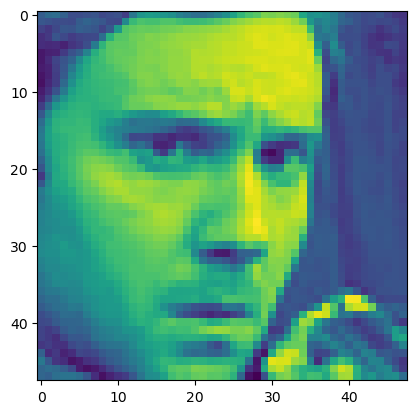

In [7]:
plt.imshow(np.array(df.pixels[0].split()).reshape(48,48).astype('float'))

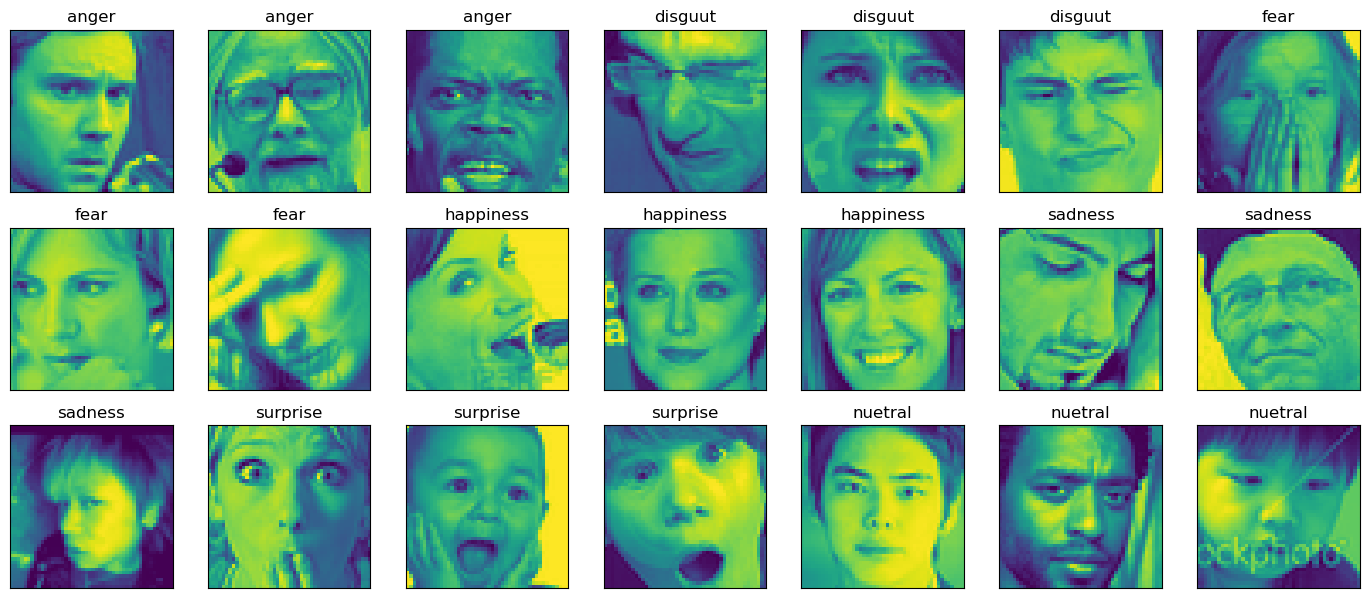

In [8]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

In [9]:
image_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48,1).astype('float32') )

In [10]:
image_array = np.stack(image_array, axis = 0)

In [11]:
image_array.shape

(28709, 48, 48, 1)

In [12]:
#plt.imshow(image_array[2])

In [13]:
labels = df.emotion.values

In [14]:
y_train = labels
X_train = image_array

In [15]:
X_train.shape

(28709, 48, 48, 1)

In [16]:
y_train.shape

(28709,)

In [17]:
basemodal = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape =(48,48,1)),
                                       tf.keras.layers.MaxPool2D(2,2),
                                       tf.keras.layers.BatchNormalization(),
                                       
                                       tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape =(48,48,1)),
                                       tf.keras.layers.MaxPool2D(2,2),
                                       tf.keras.layers.BatchNormalization(),
                                        
                                       tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', input_shape =(48,48,1)),
                                       tf.keras.layers.MaxPool2D(2,2),
                                       tf.keras.layers.BatchNormalization(),
                                        
                                        tf.keras.layers.Flatten(),
                                       
                                       tf.keras.layers.Dense(128,activation='relu'),
                                        tf.keras.layers.Dense(7, activation= 'softmax')
                                       
                                       ])




In [18]:
basemodal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                        

In [19]:
basemodal.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.1),
                 loss = 'sparse_categorical_crossentropy',
                 metrics= ['accuracy'])

In [20]:
try:
    os.mkdir('checkpoint')
except:
    pass

In [21]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')


In [22]:
basemodal.fit(X_train, y_train, epochs = 3, validation_split= 0.1, callbacks= call_back)

Epoch 1/3
807/808 [============================>.] - ETA: 0s - loss: 5.4462 - accuracy: 0.2440
Epoch 1: val_accuracy improved from -inf to 0.24835, saving model to checkpoint\best_model.h5
808/808 [==============================] - 74s 90ms/step - loss: 5.4442 - accuracy: 0.2440 - val_loss: 1.8251 - val_accuracy: 0.2483
Epoch 2/3
807/808 [============================>.] - ETA: 0s - loss: 1.8204 - accuracy: 0.2465
Epoch 2: val_accuracy did not improve from 0.24835
808/808 [==============================] - 69s 85ms/step - loss: 1.8204 - accuracy: 0.2466 - val_loss: 1.8466 - val_accuracy: 0.2483
Epoch 3/3
807/808 [============================>.] - ETA: 0s - loss: 1.8216 - accuracy: 0.2467
Epoch 3: val_accuracy did not improve from 0.24835
808/808 [==============================] - 65s 81ms/step - loss: 1.8218 - accuracy: 0.2468 - val_loss: 1.8671 - val_accuracy: 0.2483


In [23]:
fianl_model = tf.keras.models.load_model(checkpoint_path)

In [24]:
from IPython.display import clear_output 

In [25]:
import time 

actual label is surprise
1/1 [==============================] - 0s 47ms/step
predicted label is happiness


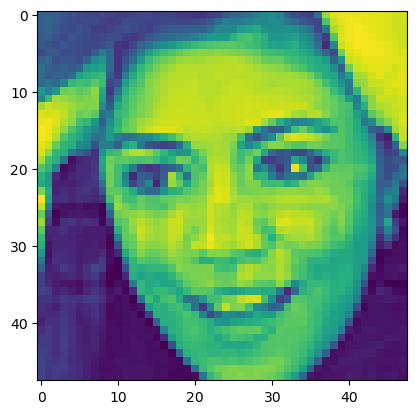

In [26]:
for k in range(40):
    print(f'actual label is {label_to_text[y_train[k]]}')
    predicted_class = fianl_model.predict(tf.expand_dims(X_train[k], 0)).argmax()
    print(f'predicted label is {label_to_text[predicted_class]}')
    plt.imshow(X_train[k].reshape((48,48)))
    plt.show()
    time.sleep(5)
    clear_output(wait = True)

In [27]:
test = pd.read_csv('test.csv')

In [28]:
y_test = test['pixels']

In [29]:
image_array_test = test.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48,1).astype('float32') )

In [30]:
image_array_test.shape

(7178,)

In [31]:
image_array_test = np.stack(image_array_test, axis = 0)

In [32]:
X_test = image_array_test

In [33]:
prediction= fianl_model.predict(X_test)

225/225 [==============================] - 6s 25ms/step


1/1 [==============================] - 0s 53ms/step
predicted label is happiness


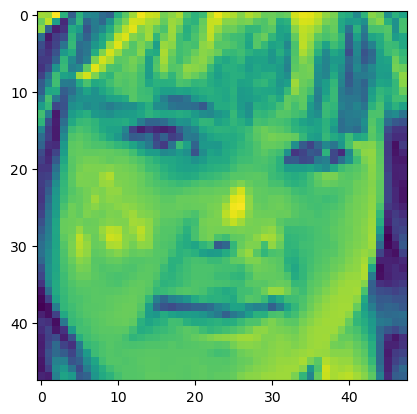

In [34]:
for k in range(4):
    predicted_class = fianl_model.predict(tf.expand_dims(X_test[k], 0)).argmax()
    print(f'predicted label is {label_to_text[predicted_class]}')
    plt.imshow(X_test[k].reshape((48,48)))
    plt.show()
    time.sleep(5)
    clear_output(wait = True)

In [127]:
prediction = fianl_model.predict(tf.expand_dims(X_test[k], 0)).argmax()

1/1 [==============================] - 0s 48ms/step


In [128]:
prediction

3

In [130]:
test.shape

(7178, 1)